In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas
from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

Text(2, 0.5, '出力値0.5')

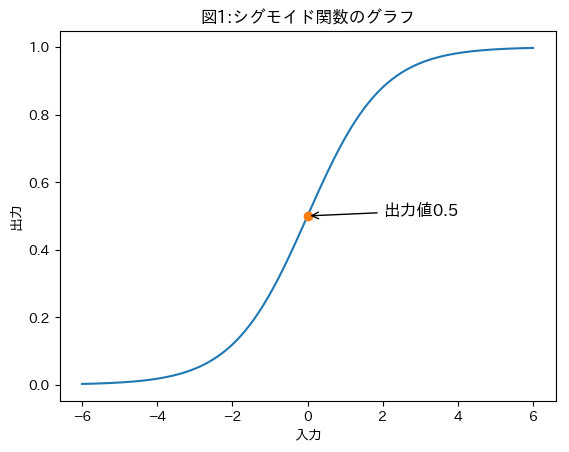

In [2]:
def std_sigmoid(x):
    """
    シグモイド関数
    :param x: x
    :return: シグモイド関数
    """
    return 1 / (1 + np.exp(-x))


# シグモイド関数のグラフ表示
plt.title('図1:シグモイド関数のグラフ')
t = np.linspace(-6, 6, 100)
plt.plot(t, std_sigmoid(t))
plt.xlabel('入力')
plt.ylabel('出力')
plt.plot(0, 0.5, 'o')
plt.annotate('出力値0.5', xy=(0, 0.5), xytext=(2, 0.5), arrowprops=dict(arrowstyle='->'), fontsize=12)

Text(0, 0.5, '出力：ラベルAの値')

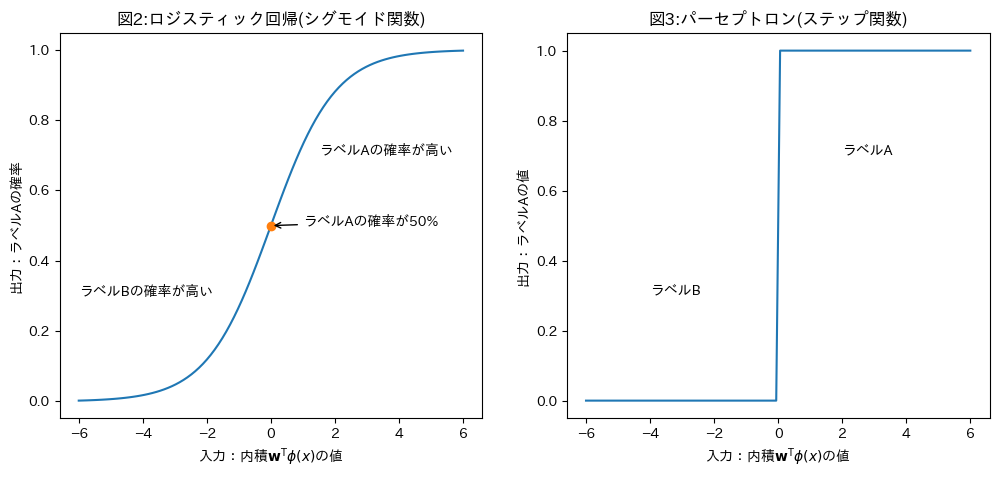

In [3]:
def step(x):
    """
    ステップ関数
    :param x: x
    :return: ステップ関数
    """
    return np.array(x >= 0)


# シグモイド関数のグラフ表示
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

t = np.linspace(-6, 6, 100)
plt.plot(t, std_sigmoid(t))
plt.plot(0, 0.5, 'o')

plt.text(-6, 0.3, 'ラベルBの確率が高い')
plt.text(1.5, 0.7, 'ラベルAの確率が高い')
plt.annotate('ラベルAの確率が50%', xy=(0, 0.5), xytext=(1, 0.5), arrowprops=dict(arrowstyle='->'))

plt.title('図2:ロジスティック回帰(シグモイド関数)')
plt.xlabel('入力：内積'r'$\mathbf{w}^{\mathrm{T}}\phi(x)$''の値')
plt.ylabel('出力：ラベルAの確率')

# ステップ関数のグラフ表示
plt.subplot(1, 2, 2)

t = np.linspace(-6, 6, 100)
plt.plot(t, step(t))

plt.text(-4, 0.3, 'ラベルB')
plt.text(2, 0.7, 'ラベルA')

plt.title('図3:パーセプトロン(ステップ関数)')
plt.xlabel('入力：内積'r'$\mathbf{w}^{\mathrm{T}}\phi(x)$''の値')
plt.ylabel('出力：ラベルAの値')

In [4]:
import copy


def discriminant(p, w):
    """
    識別関数
    :param p: 特徴ベクトル
    :param w: 係数ベクトル
    :return: 識別関数
    """
    return np.dot(p, w)


dataset = pd.DataFrame({'x0': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        'x1': [1.5, 2, 3, 1.5, 0.5, -1, -2, -3, -1.5, 0],
                        'x2': [1, 2.5, 3, -2, 2, -3, -1.2, -0.5, 2, -1.5],
                        'label': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
                        'label_index': [1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0]})

# 特徴ベクトル
x = np.array(dataset.loc[:, ['x0', 'x1', 'x2']])

# 係数ベクトル
w = [0, 1, 1]

# データ数
data_size = len(dataset.index)

# 識別関数の値
output_label = np.zeros(data_size)

# 予測の出力値
y = np.zeros(data_size)

# データセットから予測値を計算
for i in range(data_size):
    output_label[i] = discriminant(x[i], w)
    y[i] = std_sigmoid(output_label[i])

dataset_ = copy.deepcopy(dataset)
dataset_['識別関数の値'] = output_label
dataset_['予測値Y'] = y
dataset_

,x0,x1,x2,label,label_index,識別関数の値,予測値Y
0,1,1.5,1.0,A,1.0,2.5,0.924142
1,1,2.0,2.5,A,1.0,4.5,0.989013
2,1,3.0,3.0,A,1.0,6.0,0.997527
3,1,1.5,-2.0,A,1.0,-0.5,0.377541
4,1,0.5,2.0,A,1.0,2.5,0.924142
5,1,-1.0,-3.0,B,0.0,-4.0,0.017986
6,1,-2.0,-1.2,B,0.0,-3.2,0.039166
7,1,-3.0,-0.5,B,0.0,-3.5,0.029312
8,1,-1.5,2.0,B,0.0,0.5,0.622459
9,1,0.0,-1.5,B,0.0,-1.5,0.182426


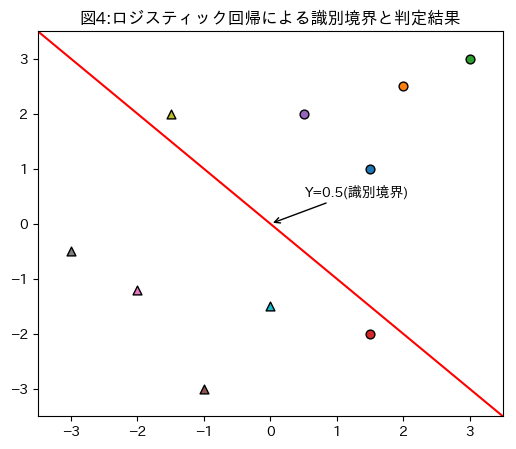

In [5]:
# データのプロット
plt.figure(figsize=(6, 5))
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])
plt.title('図4:ロジスティック回帰による識別境界と判定結果')

for i in range(data_size):
    if dataset.loc[i, 'label_index'] == 1.0:
        m = 'o'
    else:
        m = '^'

    plt.scatter(dataset.loc[i, 'x1'], dataset.loc[i, 'x2'], s=40,
                label='ラベルA', marker=m, edgecolor='k', cmap='bwr', vmin=0, vmax=1)

plt.annotate('Y=0.5(識別境界)', xy=(0, 0), xytext=(0.5, 0.5), arrowprops=dict(arrowstyle='->'))

# 識別境界のプロット
line_x1 = np.linspace(-5, 5, 100)
plt.plot(line_x1, -1 * (line_x1 * w[1] + w[0]) / w[2], 'r-')

In [6]:
import copy

# 正解ラベル
label_answer = np.array(dataset['label_index'])

# 予測ラベル
label_test = np.zeros(data_size)

# 予測結果の正否
result = np.zeros(data_size)

threshold = 0.5

# データセットから予測ラベルの出力
for i in range(data_size):
    # ラベルの判定
    label_test[i] = y[i] >= threshold

    # 成否の判定
    result[i] = label_answer[i] == label_test[i]

dataset_ = copy.deepcopy(dataset)
dataset_['識別関数の値'] = output_label
dataset_['予測値Y'] = y
dataset_['予測ラベル'] = label_test
dataset_['予測の正否'] = result
dataset_

,x0,x1,x2,label,label_index,識別関数の値,予測値Y,予測ラベル,予測の正否
0,1,1.5,1.0,A,1.0,2.5,0.924142,1.0,1.0
1,1,2.0,2.5,A,1.0,4.5,0.989013,1.0,1.0
2,1,3.0,3.0,A,1.0,6.0,0.997527,1.0,1.0
3,1,1.5,-2.0,A,1.0,-0.5,0.377541,0.0,0.0
4,1,0.5,2.0,A,1.0,2.5,0.924142,1.0,1.0
5,1,-1.0,-3.0,B,0.0,-4.0,0.017986,0.0,1.0
6,1,-2.0,-1.2,B,0.0,-3.2,0.039166,0.0,1.0
7,1,-3.0,-0.5,B,0.0,-3.5,0.029312,0.0,1.0
8,1,-1.5,2.0,B,0.0,0.5,0.622459,1.0,0.0
9,1,0.0,-1.5,B,0.0,-1.5,0.182426,0.0,1.0


In [7]:
def log(x):
    """
    対数(0の場合は微小値を追加)
    :param x: x
    :return: 対数
    """
    return math.log(max(x, 1.0E-20))


# 平均交差エントロピー誤差
error = 0

for i in range(data_size):
    error -= label_answer[i] * log(y[i]) + (1 - label_answer[i]) * log(1 - y[i])

error / data_size

0.24087238242672498

In [8]:
# 学習率
eta = 0.05

# 誤差
error = 0

for i in range(data_size):
    w -= eta * (y[i] - label_answer[i]) * x[i]

<1回目>
誤差関数の値 : 6.79
交差エントロピー誤差 : 0.6793454758840894
係数ベクトルの値 : w0 = 0.89, w1 = 0.34

<2回目>
誤差関数の値 : 4.56
交差エントロピー誤差 : 0.455615160670021
係数ベクトルの値 : w0 = 0.81, w1 = 0.57

<3回目>
誤差関数の値 : 3.51
交差エントロピー誤差 : 0.35131148182776606
係数ベクトルの値 : w0 = 0.73, w1 = 0.74

<4回目>
誤差関数の値 : 2.92
交差エントロピー誤差 : 0.29155420040114044
係数ベクトルの値 : w0 = 0.67, w1 = 0.87

<5回目>
誤差関数の値 : 2.53
交差エントロピー誤差 : 0.2532988035614374
係数ベクトルの値 : w0 = 0.62, w1 = 0.98

<6回目>
誤差関数の値 : 2.25
交差エントロピー誤差 : 0.22507803579311184
係数ベクトルの値 : w0 = 0.57, w1 = 1.08

<7回目>
誤差関数の値 : 2.04
交差エントロピー誤差 : 0.2036351499921536
係数ベクトルの値 : w0 = 0.53, w1 = 1.16

<8回目>
誤差関数の値 : 1.87
交差エントロピー誤差 : 0.18695161160321971
係数ベクトルの値 : w0 = 0.50, w1 = 1.24

<9回目>
誤差関数の値 : 1.73
交差エントロピー誤差 : 0.17313716212589
係数ベクトルの値 : w0 = 0.46, w1 = 1.31

<10回目>
誤差関数の値 : 1.62
交差エントロピー誤差 : 0.16173150443543144
係数ベクトルの値 : w0 = 0.43, w1 = 1.37

<11回目>
誤差関数の値 : 1.52
交差エントロピー誤差 : 0.1518919163503551
係数ベクトルの値 : w0 = 0.41, w1 = 1.43

<12回目>
誤差関数の値 : 1.43
交差エントロピー誤差 : 0.14348301323358498
係数ベクトルの

Text(0, 0.5, '平均誤差')

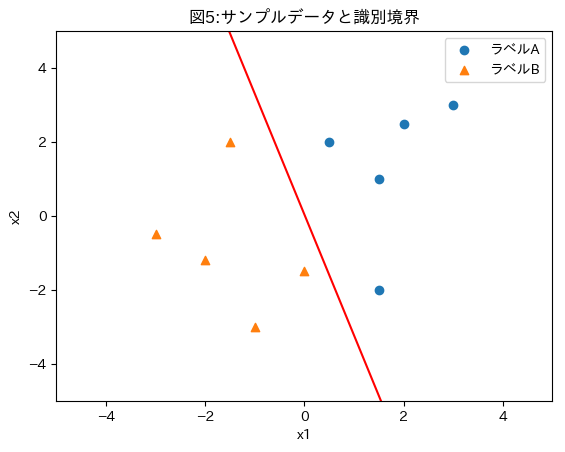

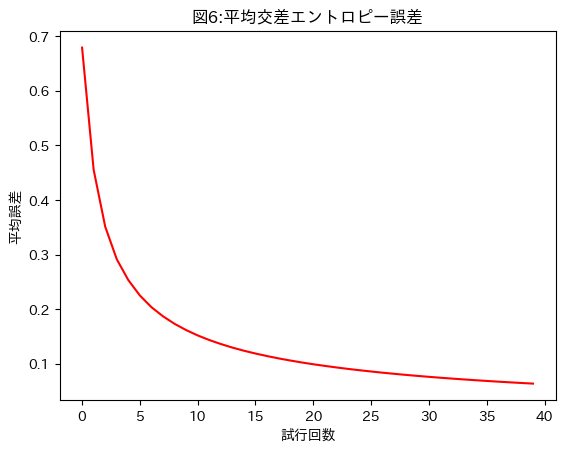

In [9]:
def discriminant(p, w):
    """
    識別関数
    :param p: 特徴ベクトル
    :param w: 係数ベクトル
    :return: 識別結果
    """
    return np.dot(p, w)


def std_sigmoid(x):
    """
    シグモイド関数
    :param x: x
    :return: シグモイド関数
    """
    return 1 / (1 + np.exp(-x))


def predict(p, w):
    """
    予測
    :param p: 特徴ベクトル
    :param w: 係数ベクトル
    :return: 予測結果
    """
    return std_sigmoid(discriminant(p, w))


def log(x):
    """
    対数(0の場合は微小値を追加)
    :param x: x
    :return: 対数
    """
    return math.log(max(x, 1.0E-20))


dataset = pd.DataFrame({'x0': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        'x1': [1.5, 2, 3, 1.5, 0.5, -1, -2, -3, -1.5, 0],
                        'x2': [1, 2.5, 3, -2, 2, -3, -1.2, -0.5, 2, -1.5],
                        'label': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
                        'label_index': [1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0]})

# 正解ラベル
label_answer = np.array(dataset['label_index'])

# 係数ベクトル
w = [1, 0, 0]

# 特徴ベクトル
x = np.array(dataset.loc[:, ['x0', 'x1', 'x2']])

# 最大試行回数
max_iter = 40

# データ数
data_size = len(dataset.index)

# 識別関数の値
output_label = np.zeros(data_size)

# 予測の出力値
y = np.zeros(data_size)

# コスト
cost_sum = np.zeros(max_iter)

# データセットから予測ラベルを出力
for iter_ in range(max_iter):
    for i in np.random.permutation(np.arange(data_size)):
        # 予測値の計算
        y[i] = predict(x[i], w)

        # 誤差の更新(確率的勾配降下法)
        w -= eta * (y[i] - label_answer[i]) * x[i]

    # 交差エントロピー誤差
    error = 0

    for i in range(data_size):
        error -= label_answer[i] * log(y[i]) + (1 - label_answer[i]) * log(1 - y[i])

    cost_sum[iter_] = error / data_size
    
    print('<{0}回目>'.format(iter_ + 1))
    print('誤差関数の値 : {0:.2f}'.format(error))
    print('交差エントロピー誤差 : {0}'.format(cost_sum[iter_]))
    print('係数ベクトルの値 : w0 = {0:.2f}, w1 = {1:.2f}'.format(w[0], w[1]))
    print()

# グラフの出力
plt.title('図5:サンプルデータと識別境界')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

# データのプロット
label_a = dataset[dataset['label_index'] == 1]
plt.scatter(label_a['x1'], label_a['x2'], label='ラベルA', marker='o')
label_b = dataset[dataset['label_index'] == 0]
plt.scatter(label_b['x1'], label_b['x2'], label='ラベルB', marker='^')
plt.legend()

# 識別境界のプロット
line_x1 = np.linspace(-5, 5, 10)
plt.plot(line_x1, -1 * (line_x1 * w[1] + w[0]) / w[2], 'r-')

# コスト曲線の出力
plt.figure()
plt.title('図6:平均交差エントロピー誤差')
x_num = np.arange(max_iter)
plt.plot(x_num, cost_sum[x_num], 'r-')
plt.xlabel('試行回数')
plt.ylabel('平均誤差')

In [10]:
baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')[['身長', '体重']]
baseball = baseball.rename(columns={'身長': 'x1', '体重': 'x2'})
baseball['label'] = '野球'
baseball['label_index'] = 1.0
baseball['x0'] = 1
sumou = pd.read_csv('../../9_data/相撲/力士身長体重.csv')[['身長', '体重']]
sumou = sumou.rename(columns={'身長': 'x1', '体重': 'x2'})
sumou['label'] = '相撲'
sumou['label_index'] = 0
sumou['x0'] = 1
train_data = pd.concat([baseball.iloc[0:750, :],
                        sumou.iloc[0:50, :]]).loc[:, ['label', 'label_index', 'x0', 'x1', 'x2']]
test_data = pd.concat([baseball.iloc[750:, :], sumou.iloc[50:, :]]).loc[:, ['label', 'label_index', 'x0', 'x1', 'x2']]

<1回目>
誤差関数の値 : 162.65
交差エントロピー誤差 : 0.2033090535999793
係数ベクトルの値 : w0 = 1.00, w1 = 0.02

<2回目>
誤差関数の値 : 96.51
交差エントロピー誤差 : 0.12064166303373948
係数ベクトルの値 : w0 = 1.00, w1 = 0.03

<3回目>
誤差関数の値 : 64.71
交差エントロピー誤差 : 0.08089345148544895
係数ベクトルの値 : w0 = 1.00, w1 = 0.04

<4回目>
誤差関数の値 : 50.41
交差エントロピー誤差 : 0.06301693121816244
係数ベクトルの値 : w0 = 1.00, w1 = 0.04

<5回目>
誤差関数の値 : 40.22
交差エントロピー誤差 : 0.0502717809627071
係数ベクトルの値 : w0 = 1.00, w1 = 0.05

<6回目>
誤差関数の値 : 35.68
交差エントロピー誤差 : 0.04460263269598537
係数ベクトルの値 : w0 = 1.00, w1 = 0.05

<7回目>
誤差関数の値 : 30.85
交差エントロピー誤差 : 0.03856322926446449
係数ベクトルの値 : w0 = 1.00, w1 = 0.05

<8回目>
誤差関数の値 : 27.25
交差エントロピー誤差 : 0.03405672857496504
係数ベクトルの値 : w0 = 1.00, w1 = 0.06

<9回目>
誤差関数の値 : 24.86
交差エントロピー誤差 : 0.03107880374173752
係数ベクトルの値 : w0 = 1.00, w1 = 0.06

<10回目>
誤差関数の値 : 23.13
交差エントロピー誤差 : 0.02890800452753845
係数ベクトルの値 : w0 = 1.00, w1 = 0.06

<11回目>
誤差関数の値 : 21.35
交差エントロピー誤差 : 0.026693545612015233
係数ベクトルの値 : w0 = 1.00, w1 = 0.06

<12回目>
誤差関数の値 : 19.87
交差エントロピー誤差 : 0.0248

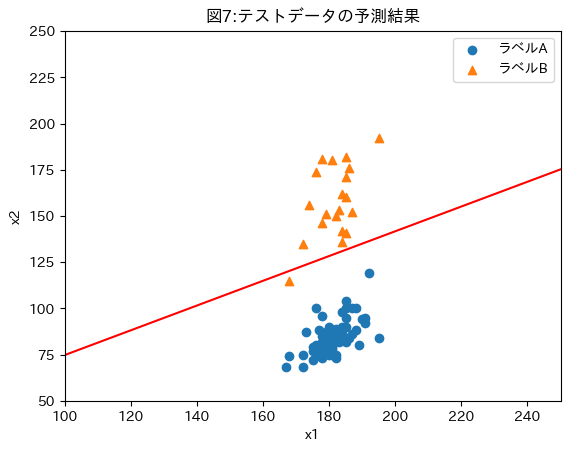

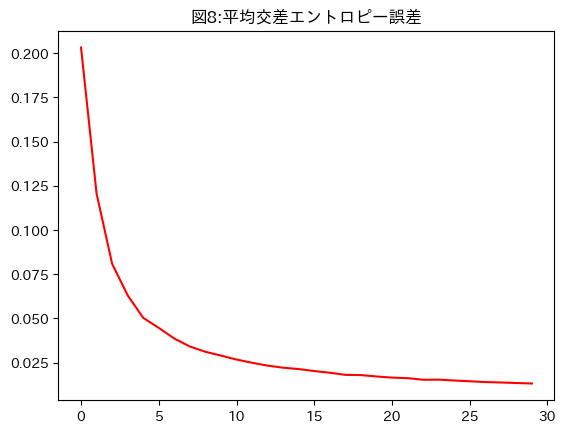

In [11]:
# 正解例

def discriminant(p, w):
    """
    識別関数
    :param p: 特徴ベクトル
    :param w: 係数ベクトル
    :return: 識別関数
    """
    return np.dot(p, w)


def std_sigmoid(x):
    """
    シグモイド関数
    :param x: x
    :return: シグモイド関数
    """
    return 1 / (1 + np.exp(-x))


def log(x):
    """
    対数(0の場合は微小値を追加)
    :param x: x
    :return: 対数
    """
    return math.log(max(x, 1.0E-20))


# 正解ラベル
label_answer = np.array(train_data['label_index'])

# 係数ベクトル
w = [1, 0, 0]

# 特徴ベクトル
x = np.array(train_data.loc[:, ['x0', 'x1', 'x2']])

# 最大試行回数
max_iter = 30

# 学習率
eta = 0.00001

# データ数
data_size = len(train_data)

# 識別関数の値
output_label = np.zeros(data_size)

# 予測の出力値
y = np.zeros(data_size)

# コスト
cost_sum = np.zeros(max_iter)

# データセットから予測ラベルの出力
for iter_ in range(max_iter):
    for i in np.random.permutation(np.arange(data_size)):
        # 予測値の計算
        output_label[i] = discriminant(x[i], w)
        y[i] = std_sigmoid(output_label[i])

        # 誤差の更新(確率的勾配降下法)
        w -= eta * (y[i] - label_answer[i]) * x[i]

    # 交差エントロピー誤差
    error = 0

    for i in range(data_size):
        error -= label_answer[i] * log(y[i]) + (1 - label_answer[i]) * log(1 - y[i])

    cost_sum[iter_] = error / data_size
    
    print('<{0}回目>'.format(iter_ + 1))
    print('誤差関数の値 : {0:.2f}'.format(error))
    print('交差エントロピー誤差 : {0}'.format(cost_sum[iter_]))
    print('係数ベクトルの値 : w0 = {0:.2f}, w1 = {1:.2f}'.format(w[0], w[1]))
    print()

# グラフの出力
plt.title('図7:テストデータの予測結果')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([100, 250])
plt.ylim([50, 250])

# データのプロット
label_a = test_data[test_data['label_index'] == 1]
plt.scatter(label_a['x1'], label_a['x2'], label='ラベルA', marker='o')
label_b = test_data[test_data['label_index'] == 0]
plt.scatter(label_b['x1'], label_b['x2'], label='ラベルB', marker='^')
plt.legend()

# 識別境界のプロット
line_x1 = np.linspace(50, 250, 200)
plt.plot(line_x1, -1 * (line_x1 * w[1] + w[0]) / w[2], 'r-')

# コスト曲線の出力
plt.figure()
plt.title('図8:平均交差エントロピー誤差')
x_num = np.arange(max_iter)
plt.plot(x_num, cost_sum[x_num], 'r-')